In [2]:
import time
import pandas as pd
import numpy as np
from queue import Queue

class PathFinder:
    def __init__(self):
        """Initialize the LogPrintSave class."""


    def find_path(self, start, end):
        """A simple pathfinding method. Returns a list of directions from start to end."""
        path = []
        dx, dy = end[0] - start[0], end[1] - start[1]

        # Move horizontally
        while dx != 0:
            if dx > 0:
                path.append("right")
                dx -= 1
            else:
                path.append("left")
                dx += 1

        # Move vertically
        while dy != 0:
            if dy > 0:
                path.append("down")
                dy -= 1
            else:
                path.append("up")
                dy += 1

        return path

    def follow_path(self, path):
        """Follow a given path of directions. Stop after 2 seconds."""
        start_time = time.time()
        for direction in path:
            if time.time() - start_time > 2:  # Stop after 2 seconds
                break
            self.pokeMMO.controller.key_press(
                direction, delay=0.2
            )  # Assuming 0.2 second delay for each key press

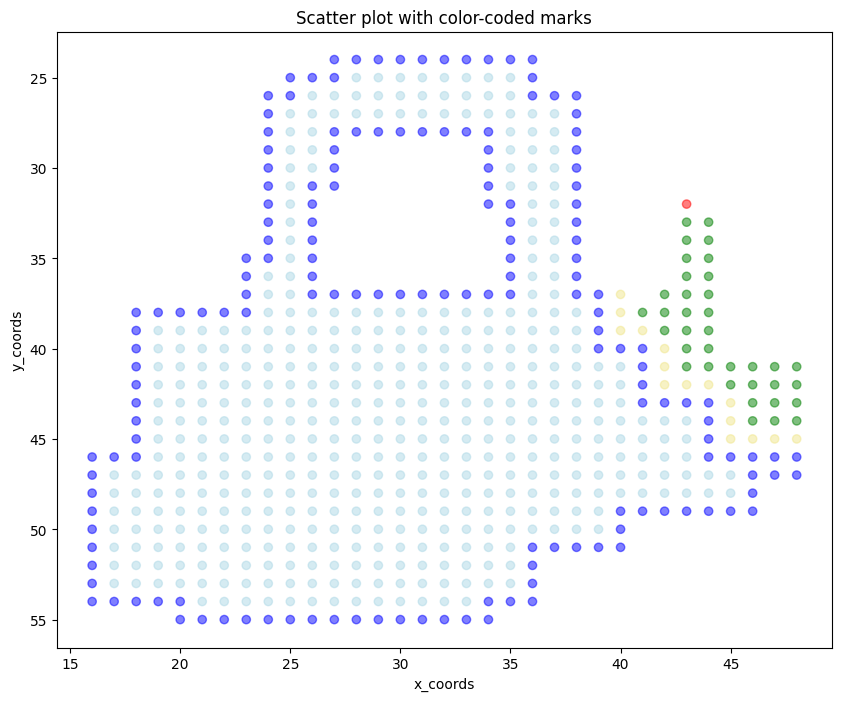

In [3]:
import matplotlib.pyplot as plt
df_melted=pd.read_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY_coords_tracking.csv',index_col=0)
# 创建颜色映射
color_map = {1: 'lightblue', 2: 'blue', 3: 'khaki', 4: 'green', 112: 'red'}

# 将 mark 列转换为颜色
df_melted['color'] = df_melted['mark'].map(color_map)

# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(df_melted['x_coords'], df_melted['y_coords'], c=df_melted['color'], alpha=0.5)

# 反转 y 轴
plt.gca().invert_yaxis()

# 设置图标题和轴标签
plt.title('Scatter plot with color-coded marks')
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()

In [4]:
df_melted.head()

,y_coords,x_coords,mark,color
0,46,16,2,blue
1,47,16,2,blue
2,48,16,2,blue
3,49,16,2,blue
4,50,16,2,blue


In [ ]:
start_point=(43,32) 
end_point=(40,41)

In [6]:

df=df_melted.copy()

# 确定网格的大小
max_x = df['x_coords'].max() + 1
max_y = df['y_coords'].max() + 1

# 创建网格，所有元素默认为障碍物（0表示障碍物）
grid = np.zeros((max_y, max_x), dtype=int)

# 设置可走的区域
grid[df[(df['mark'] == 3) | (df['mark'] == 4)]['y_coords'], df[(df['mark'] == 3) | (df['mark'] == 4)]['x_coords']] = 1

# BFS算法
def bfs(start, end):
    queue = Queue()
    queue.put(start)
    visited = set()
    parent = {}
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while not queue.empty():
        curr = queue.get()
        if curr == end:
            path = []
            while curr is not None:
                path.append(curr)
                curr = parent.get(curr)
            return path[::-1]

        for direction in directions:
            next_ = (curr[0] + direction[0], curr[1] + direction[1])
            if 0 <= next_[0] < max_y and 0 <= next_[1] < max_x and grid[next_] == 1 and next_ not in visited:
                parent[next_] = curr
                queue.put(next_)
                visited.add(next_)

    return None

start = (43, 32)
end = (45, 45)

path = bfs(start, end)
print(path)


None


In [7]:
df = df_melted.copy()

# Reset the index if it's not a continuous integer sequence starting from 0
df = df.reset_index(drop=True)
df['x_coords'] = df['x_coords'].astype(int)
df['y_coords'] = df['y_coords'].astype(int)

# 确定网格的大小
max_x = df['x_coords'].max() + 1
max_y = df['y_coords'].max() + 1

# 创建网格，所有元素默认为障碍物（0表示障碍物）
grid = np.zeros((max_y, max_x), dtype=int)

# 设置可走的区域
grid[df[(df['mark'] == 3) | (df['mark'] == 4)|(df['mark']==112)]['y_coords'], df[(df['mark'] == 3) | (df['mark'] == 4)|(df['mark']==112)]['x_coords'],] = 1

# BFS算法
def bfs(start, end):
    queue = Queue()
    queue.put(start)
    visited = set()
    parent = {}
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while not queue.empty():
        curr = queue.get()
        if curr == end:
            path = []
            while curr is not None:
                path.append(curr)
                curr = parent.get(curr)
            return path[::-1]

        for direction in directions:
            next_ = (curr[0] + direction[0], curr[1] + direction[1])
            if 0 <= next_[0] < max_y and 0 <= next_[1] < max_x and grid[next_] == 1 and next_ not in visited:
                parent[next_] = curr
                queue.put(next_)
                visited.add(next_)

    return None

start = (32, 43)
end = (45, 45)

path = bfs(start, end)
print(path)

KeyboardInterrupt: 

In [18]:
df.describe()

,y_coords,x_coords,mark
count,654.000000,654.000000,654.000000
mean,42.097859,31.035168,1.628440
std,8.152803,8.009201,4.394189
min,24.000000,16.000000,1.000000
25%,38.000000,25.000000,1.000000
50%,43.000000,31.000000,1.000000
75%,48.000000,37.000000,2.000000
max,55.000000,48.000000,112.000000


In [5]:
import heapq

# A*算法
def a_star(start, end):
    heap = []
    heapq.heappush(heap, (0, start))
    parent = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while heap:
        curr = heapq.heappop(heap)[1]

        if curr == end:
            path = []
            while curr is not None:
                path.append(curr)
                curr = parent[curr]
            return path[::-1]

        for next_node in neighbors(curr):
            tentative_g_score = g_score[curr] + 1
            if next_node not in g_score or tentative_g_score < g_score[next_node]:
                g_score[next_node] = tentative_g_score
                f_score[next_node] = tentative_g_score + heuristic(next_node, end)
                parent[next_node] = curr
                if next_node not in [i[1] for i in heap]:
                    heapq.heappush(heap, (f_score[next_node], next_node))

    return None

# 启发式函数（这里使用曼哈顿距离）
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# 获取邻居节点
def neighbors(node):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    result = []
    for direction in directions:
        next_node = (node[0] + direction[0], node[1] + direction[1])
        if 0 <= next_node[0] < max_y and 0 <= next_node[1] < max_x and grid[next_node] == 1:
            result.append(next_node)
    return result

start = (32, 43)
end = (45, 45)

path = a_star(start, end)
print(path)


NameError: name 'max_y' is not defined

In [12]:
import numpy as np
import heapq

df = df_melted.copy()

# Reset the index if it's not a continuous integer sequence starting from 0
df = df.reset_index(drop=True)
df['x_coords'] = df['x_coords'].astype(int)
df['y_coords'] = df['y_coords'].astype(int)

# 确定网格的大小
max_x = df['x_coords'].max() + 1
max_y = df['y_coords'].max() + 1

# 创建网格，所有元素默认为障碍物（0表示障碍物）
grid = np.zeros((max_y, max_x), dtype=int)

# 设置可走的区域
grid[df[(df['mark'] == 3) | (df['mark'] == 4)|(df['mark']==112)]['y_coords'], df[(df['mark'] == 3) | (df['mark'] == 4)|(df['mark']==112)]['x_coords'],] = 1

# 启发式函数（这里使用曼哈顿距离）
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# 获取邻居节点
def neighbors(node):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    result = []
    for direction in directions:
        next_node = (node[0] + direction[0], node[1] + direction[1])
        if 0 <= next_node[0] < max_y and 0 <= next_node[1] < max_x and grid[next_node] == 1:
            result.append(next_node)
    return result

# A*算法
def a_star(start, end):
    heap = []
    heapq.heappush(heap, (0, start))
    parent = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while heap:
        curr = heapq.heappop(heap)[1]

        if curr == end:
            path = []
            while curr is not None:
                path.append(curr)
                curr = parent[curr]
            return path[::-1]

        for next_node in neighbors(curr):
            tentative_g_score = g_score[curr] + 1
            if next_node not in g_score or tentative_g_score < g_score[next_node]:
                g_score[next_node] = tentative_g_score
                f_score[next_node] = tentative_g_score + heuristic(next_node, end)
                parent[next_node] = curr
                if next_node not in [i[1] for i in heap]:
                    heapq.heappush(heap, (f_score[next_node], next_node))

    return None

start = (32, 43)
end = (45, 45)

path = a_star(start, end)
print(path)


[(32, 43), (33, 43), (33, 44), (34, 44), (35, 44), (36, 44), (37, 44), (38, 44), (39, 44), (40, 44), (41, 44), (41, 45), (42, 45), (43, 45), (44, 45), (45, 45)]


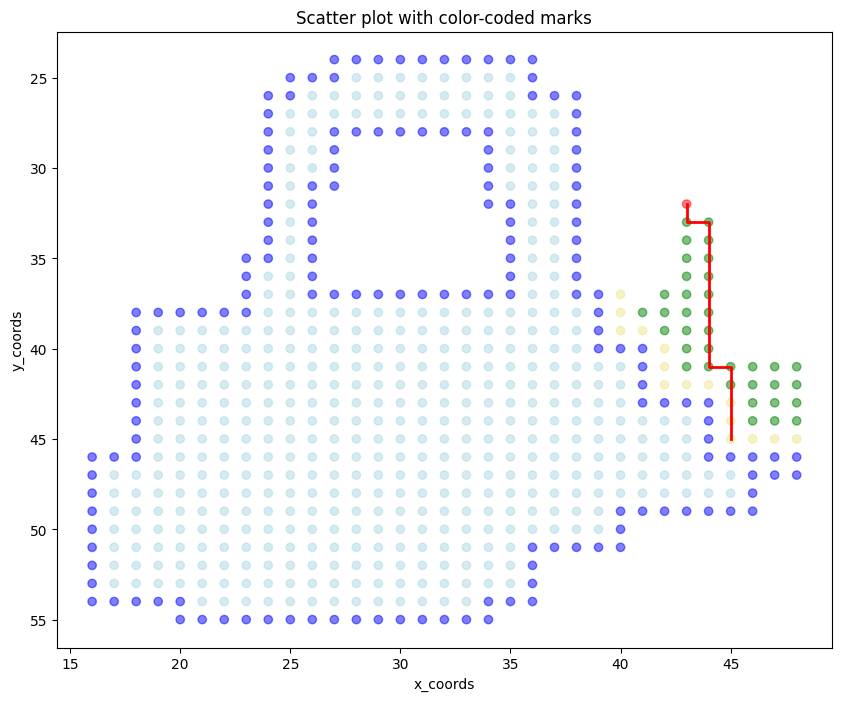

In [11]:
# 前面的步骤都和原来一样，这里直接从创建散点图开始
plt.figure(figsize=(10, 8))
plt.scatter(df_melted['x_coords'], df_melted['y_coords'], c=df_melted['color'], alpha=0.5)

# 添加路径线
if path is not None:  # 如果找到了路径
    # 将路径中的坐标转换为两个列表：X坐标列表和Y坐标列表
    path_y = [point[0] for point in path]
    path_x = [point[1] for point in path]

    # 在散点图上添加路径线
    plt.plot(path_x, path_y, color='red', linewidth=2)

# 反转 y 轴
plt.gca().invert_yaxis()

# 设置图标题和轴标签
plt.title('Scatter plot with color-coded marks')
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [ ]:
#  自行车1秒钟 11格子， 转向需要0.2秒，10秒钟跑步5格，

In [13]:
def path_to_keys_and_delays(path):
    keys_and_delays = []
    for i in range(1, len(path)):
        dy = path[i][0] - path[i-1][0]
        dx = path[i][1] - path[i-1][1]
        if dy == 1: key = 's'
        elif dy == -1: key = 'w'
        elif dx == 1: key = 'd'
        elif dx == -1: key = 'a'
        else: continue

        if keys_and_delays and keys_and_delays[-1][0] == key:
            # 如果与上一个方向相同，则增加对应的按键时间
            keys_and_delays[-1] = (key, keys_and_delays[-1][1] + 0.1)
        else:
            # 如果与上一个方向不同，则添加新的按键和延时
            keys_and_delays.append((key, 0.2))
    
    return keys_and_delays

keys_and_delays = path_to_keys_and_delays(path)

# for key, delay in keys_and_delays:
#     key_press(key, delay)


In [14]:
keys_and_delays


[('s', 0.2), ('d', 0.2), ('s', 0.8999999999999999), ('d', 0.2), ('s', 0.5)]